In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Science I: Final Assignment 

## Credit Risk Modeling Project 
### July 21st 2024

In [2]:
df = pd.read_csv('C:/Users/James/OneDrive/桌面/MMgt/DataScience/credit risk project/data.csv')
df.head()

FileNotFoundError: [Errno 2] File b'C:/Users/James/OneDrive/\xe6\xa1\x8c\xe9\x9d\xa2/MMgt/DataScience/credit risk project/data.csv' does not exist: b'C:/Users/James/OneDrive/\xe6\xa1\x8c\xe9\x9d\xa2/MMgt/DataScience/credit risk project/data.csv'

## Handling Missing Data and Duplicated IDs

In [3]:
##### check Duplicates 
df['id'].duplicated().any()

False

In [4]:
##### Check data
columns_no_nas = df.columns[df.isna().sum() == 0]
df_no_nas = df[columns_no_nas]
df_no_nas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 41 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       855969 non-null  int64  
 1   member_id                855969 non-null  int64  
 2   loan_amnt                855969 non-null  int64  
 3   funded_amnt              855969 non-null  int64  
 4   funded_amnt_inv          855969 non-null  float64
 5   term                     855969 non-null  object 
 6   int_rate                 855969 non-null  float64
 7   installment              855969 non-null  float64
 8   grade                    855969 non-null  object 
 9   sub_grade                855969 non-null  object 
 10  home_ownership           855969 non-null  object 
 11  annual_inc               855969 non-null  float64
 12  verification_status      855969 non-null  object 
 13  issue_d                  855969 non-null  object 
 14  pymn

In [5]:
# Identify columns with NaN values
columns_with_nas = df.columns[df.isna().any()].tolist()

# Create a new DataFrame with only those columns
df_nas = df[columns_with_nas]

# Display the new DataFrame
df_nas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   emp_title                    806526 non-null  object 
 1   emp_length                   812908 non-null  object 
 2   desc                         121812 non-null  object 
 3   title                        855936 non-null  object 
 4   mths_since_last_delinq       416157 non-null  float64
 5   mths_since_last_record       131184 non-null  float64
 6   revol_util                   855523 non-null  float64
 7   last_pymnt_d                 847107 non-null  object 
 8   next_pymnt_d                 602998 non-null  object 
 9   last_credit_pull_d           855919 non-null  object 
 10  collections_12_mths_ex_med   855913 non-null  float64
 11  mths_since_last_major_derog  213139 non-null  float64
 12  annual_inc_joint             442 non-null     float64
 13 

In [6]:

##### Calculate the percentage of missing values for each column
missing_percentage = df_nas.isna().mean() * 100

##### Convert to a DataFrame for better readability
missing_percentage_df = missing_percentage.reset_index()
missing_percentage_df.columns = ['Feature', 'MissingPercentage']

missing_percentage_df = missing_percentage_df.sort_values(by = 'MissingPercentage', ascending=  False)

missing_percentage_df

,Feature,MissingPercentage
12,annual_inc_joint,99.948363
14,verification_status_joint,99.948363
13,dti_joint,99.948363
23,il_util,98.643759
21,mths_since_rcnt_il,98.488964
31,inq_last_12m,98.447607
20,open_il_24m,98.447607
19,open_il_12m,98.447607
18,open_il_6m,98.447607
17,open_acc_6m,98.447607


In [7]:
##### Identify columns with more than 80% missing values
columns_to_drop = missing_percentage[missing_percentage > 85].index

##### Drop those columns from df_nas
df_nas_dropped = df_nas.drop(columns=columns_to_drop)

df_nas_dropped

,emp_title,emp_length,title,mths_since_last_delinq,mths_since_last_record,revol_util,last_pymnt_d,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,NaN,10+ years,Computer,NaN,NaN,83.7,01-01-2015,NaN,01-01-2016,0.0,NaN,NaN,NaN,NaN
1,Ryder,< 1 year,bike,NaN,NaN,9.4,01-04-2013,NaN,01-09-2013,0.0,NaN,NaN,NaN,NaN
2,NaN,10+ years,real estate business,NaN,NaN,98.5,01-06-2014,NaN,01-01-2016,0.0,NaN,NaN,NaN,NaN
3,AIR RESOURCES BOARD,10+ years,personel,35.0,NaN,21.0,01-01-2015,NaN,01-01-2015,0.0,NaN,NaN,NaN,NaN
4,University Medical Group,1 year,Personal,38.0,NaN,53.9,01-01-2016,01-02-2016,01-01-2016,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,Office Assistant,8 years,Debt consolidation,NaN,77.0,82.1,01-01-2016,01-02-2016,01-01-2016,0.0,NaN,0.0,25274.0,17100.0
855965,Director of Maintenance,10+ years,Home improvement,26.0,NaN,84.5,01-01-2016,01-02-2016,01-01-2016,0.0,29.0,0.0,140285.0,10200.0
855966,Radiologist Technologist,5 years,Debt consolidation,NaN,84.0,61.3,01-01-2016,01-02-2016,01-01-2016,0.0,NaN,0.0,34178.0,18000.0
855967,Painter,1 year,Debt consolidation,22.0,NaN,30.6,01-01-2016,01-02-2016,01-01-2016,1.0,22.0,0.0,58418.0,27000.0


In [8]:
##### Function for emp_length for later EDA Analysis 
df_nas_dropped['emp_title'].fillna("Others", inplace = True)
df_nas_dropped['title'].fillna("Others", inplace = True)

def EMP_EXP_Encoder(text):
    if text == "< 1 year":
        return 0.5
    elif text == "1 year":
        return 1
    elif text == "2 years":
        return 2
    elif text == "3 years":
        return 3
    elif text == "4 years":
        return 4
    elif text == "5 years":
        return 5
    elif text == "6 years":
        return 6
    elif text == "7 years":
        return 7
    elif text == "8 years":
        return 8
    elif text == "9 years":
        return 9
    elif text == "10 years":
        return 10
    elif text == "10+ years":
        return 11
    else:
        return 0
    
df_nas_dropped['emp_length'] = df_nas_dropped['emp_length'].apply(EMP_EXP_Encoder)


In [9]:
##### for these values, NA means 0 amount, we fill na with 0 
df_nas_dropped['revol_util'].fillna(0, inplace= True)

df_nas_dropped['collections_12_mths_ex_med'].fillna(0, inplace = True)
df_nas_dropped['tot_coll_amt'].fillna(0, inplace = True)
df_nas_dropped['tot_cur_bal'].fillna(0, inplace = True)

##### for these values, NA means never happened credit deduction, we replace NA with large numbers (like 999 months)
df_nas_dropped['mths_since_last_major_derog'].fillna(999, inplace = True)
df_nas_dropped['mths_since_last_delinq'].fillna(999, inplace = True)
df_nas_dropped['mths_since_last_record'].fillna(999, inplace= True)

In [10]:
##### for revolving high credit limit, NA means didn't record, we fill NA with Sample Mean. 
df_nas_dropped['total_rev_hi_lim'].fillna(df_nas_dropped['total_rev_hi_lim'].mean, inplace= True)

In [11]:
from datetime import timedelta

##### This data set is published around 2016
##### Assume the credit risk team is clearing the record for the end of 2015 fiscal year 
df_nas_dropped['last_pymnt_d'].fillna('01-01-2016', inplace= True)
df_nas_dropped['next_pymnt_d'].fillna('01-01-2016', inplace = True)

<AxesSubplot:>

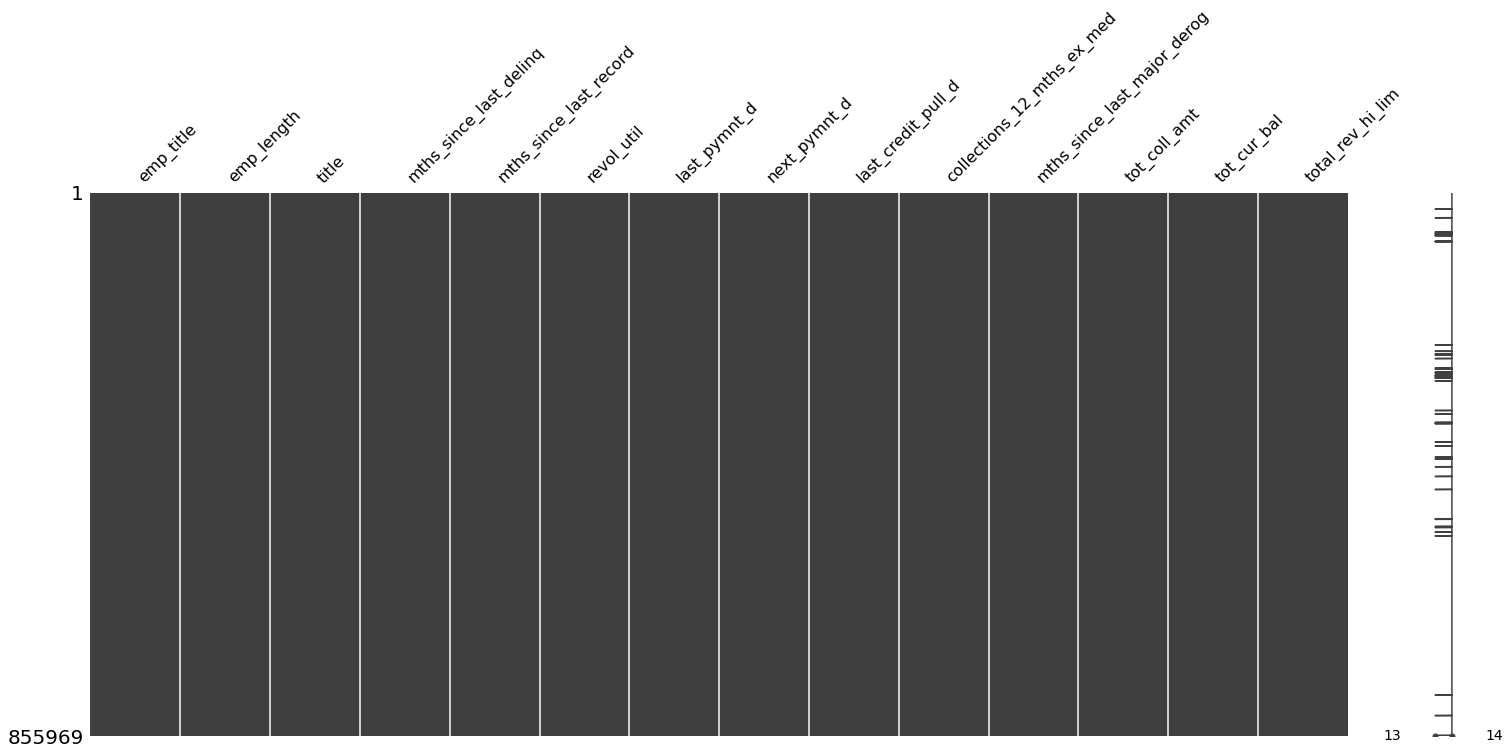

In [12]:
import missingno as meso

meso.matrix(df_nas_dropped)

In [13]:
##### Merge columns with na cleaned with columns with no nas 

df_cleaned = pd.concat([df_no_nas, df_nas_dropped], axis = 1)

df_cleaned['default_ind'].value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

In [14]:
df_cleaned.isna().sum()

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
pymnt_plan                      0
purpose                         0
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal                       0
total_acc                       0
initial_list_status             0
out_prncp                       0
out_prncp_inv                   0
total_pymnt   

In [15]:
##### Change the correct data type 
df_cleaned['total_rev_hi_lim'] = pd.to_numeric(df_cleaned['total_rev_hi_lim'], errors='coerce')

In [16]:
##### Date time conversion
date_columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
for col in date_columns:
    df_cleaned[col] = pd.to_datetime(df_cleaned[col])

##### Assume the data is published at the end of fiscal year 2015 (01-01-2016)
reference_date = pd.to_datetime('01-01-2016')

##### Calculate the difference in days for later modeling practices 
for col in date_columns:
    df_cleaned[col + '_days'] = (reference_date - df_cleaned[col]).dt.days

df_cleaned = df_cleaned.drop(columns=date_columns)



## EDA - Continous Variables 

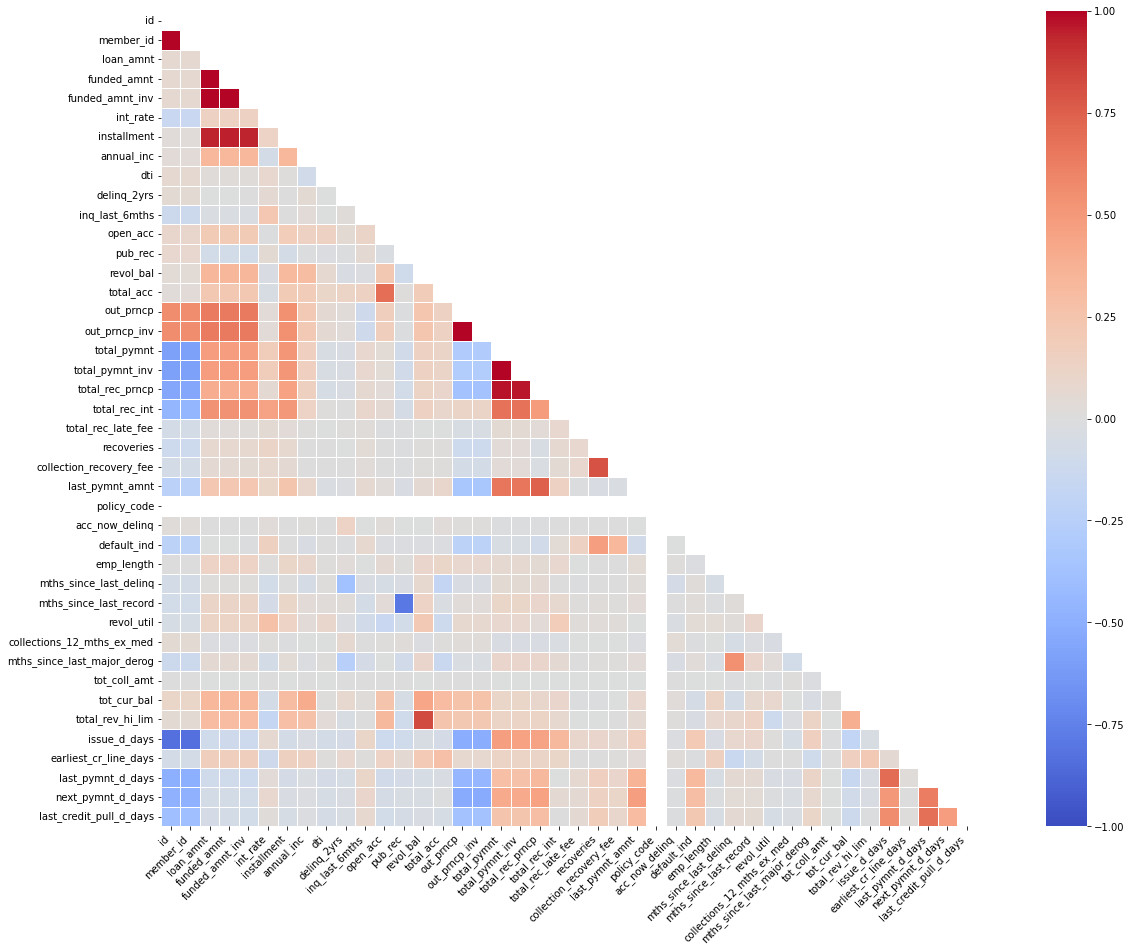

In [17]:
##### Correlation pairplot for all continunous variables with pearson method
num_col = df_cleaned.select_dtypes(include=[np.number]).columns

corr = df_cleaned[num_col].corr(method='pearson')

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(25, 15))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, center=0, annot=False,
            square=True, linewidths=.5)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

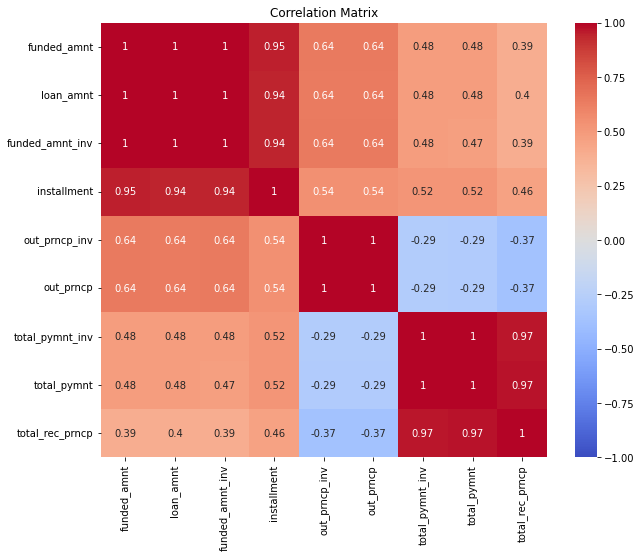

In [18]:
###### Check high correlated features to exclude multi-collinearity 

selected_columns = [
    'funded_amnt', 'loan_amnt', 'funded_amnt_inv', 'installment', 
    'out_prncp_inv', 'out_prncp', 'total_pymnt_inv', 'total_pymnt', 'total_rec_prncp'
]
df_subset = df_cleaned[selected_columns]

corr_matrix = df_subset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

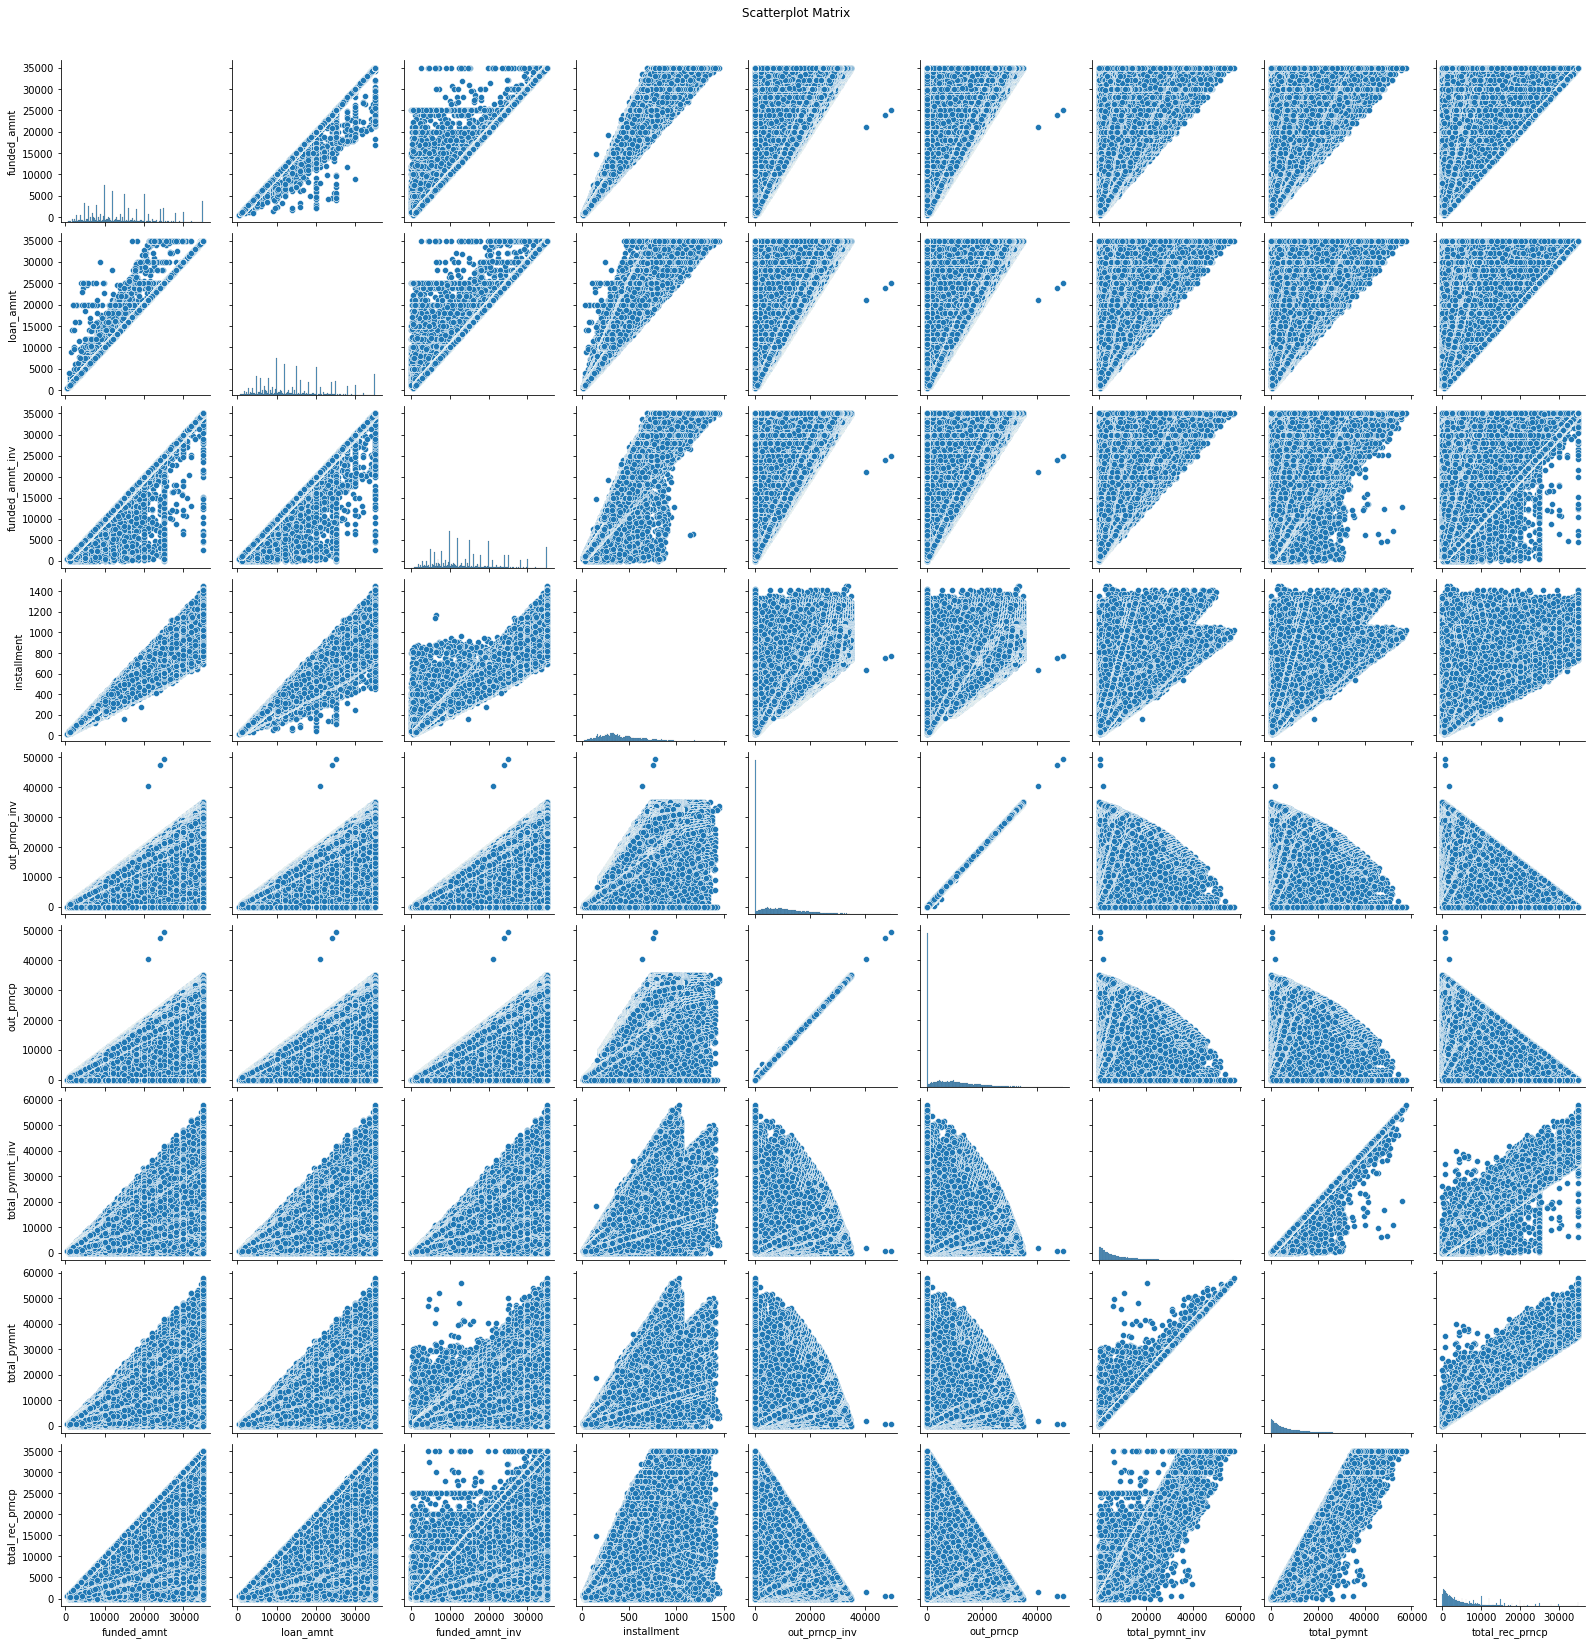

In [19]:
##### If two variables have high linearity, we should consider drop one to avoid model inaccuracy 
sns.pairplot(df_subset)
plt.suptitle('Scatterplot Matrix', y=1.02)
plt.show()

In [20]:
##### funded amount vs loan amount (Drop one)
##### total payment, total payment by investor, and total received principal (keep only one)
##### out principal by investor vs out principal (drop one )
columns_high_corr = ['funded_amnt', 'total_pymnt_inv', 'total_rec_prncp', 'out_prncp_inv']
df_cleaned.drop(columns_high_corr, axis = 1)

,id,member_id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,...,collections_12_mths_ex_med,mths_since_last_major_derog,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,issue_d_days,earliest_cr_line_days,last_pymnt_d_days,next_pymnt_d_days,last_credit_pull_d_days
0,1077501,1296599,5000,4975.0,36 months,10.65,162.87,B,B2,RENT,...,0.0,999.0,0.0,0.0,NaN,1815,11322,365,0,0.0
1,1077430,1314167,2500,2500.0,60 months,15.27,59.83,C,C4,RENT,...,0.0,999.0,0.0,0.0,NaN,1815,6206,1092,0,1087.0
2,1077175,1313524,2400,2400.0,36 months,15.96,84.33,C,C5,RENT,...,0.0,999.0,0.0,0.0,NaN,1815,5468,725,0,0.0
3,1076863,1277178,10000,10000.0,36 months,13.49,339.31,C,C1,RENT,...,0.0,999.0,0.0,0.0,NaN,1815,7304,365,0,365.0
4,1075358,1311748,3000,3000.0,60 months,12.69,67.79,B,B5,RENT,...,0.0,999.0,0.0,0.0,NaN,1815,7305,0,-1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,36371250,39102635,10000,10000.0,36 months,11.99,332.10,B,B5,RENT,...,0.0,999.0,0.0,25274.0,17100.0,365,4375,0,-1,0.0
855965,36441262,39152692,24000,24000.0,36 months,11.99,797.03,B,B5,MORTGAGE,...,0.0,29.0,0.0,140285.0,10200.0,365,15338,0,-1,0.0
855966,36271333,38982739,13000,13000.0,60 months,15.99,316.07,D,D2,RENT,...,0.0,999.0,0.0,34178.0,18000.0,365,4740,0,-1,0.0
855967,36490806,39222577,12000,12000.0,60 months,19.99,317.86,E,E3,RENT,...,1.0,22.0,0.0,58418.0,27000.0,365,4739,0,-1,0.0


<AxesSubplot:title={'center':'Loan Amount'}>

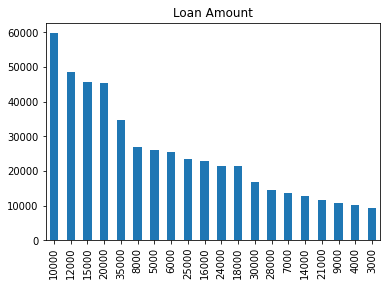

In [21]:
df_cleaned['loan_amnt'].value_counts()[: 20].plot(kind = 'bar', title = 'Loan Amount')

## EDA - Categorical Variables 

<AxesSubplot:title={'center':'Purpose of Loan'}>

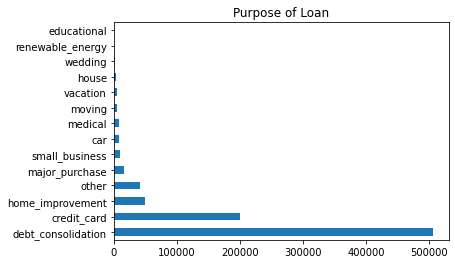

In [22]:
df_cleaned['purpose'].value_counts().plot(kind = "barh", title= 'Purpose of Loan')

<AxesSubplot:title={'center':'Home Ownership'}>

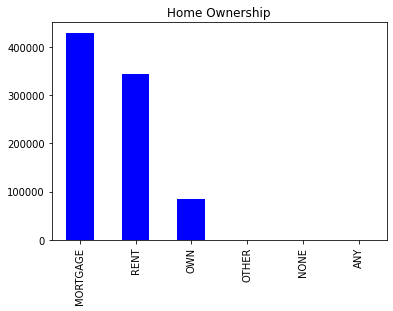

In [23]:
df_cleaned['home_ownership'].value_counts().plot(kind = 'bar', color = 'blue', title= 'Home Ownership')

<AxesSubplot:title={'center':'Working Experience by Years'}>

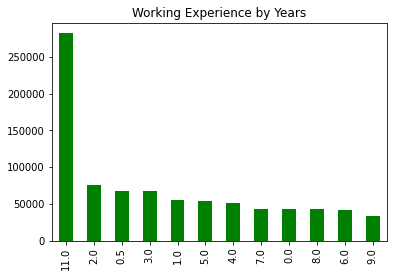

In [24]:
df_cleaned['emp_length'].value_counts().plot(kind= 'bar', color = 'green', title= 'Working Experience by Years')

<AxesSubplot:xlabel='grade', ylabel='count'>

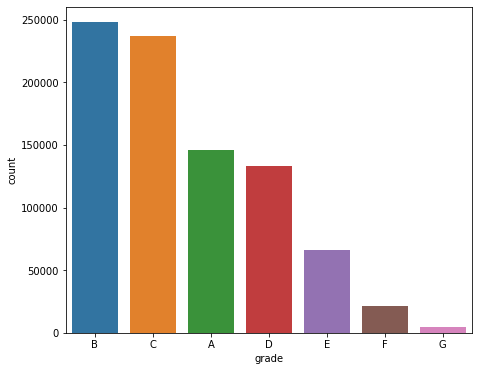

In [25]:
##### grade distribution plot

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.countplot(x="grade", data= df_cleaned, order = df_cleaned['grade'].value_counts().index)

<AxesSubplot:xlabel='default_ind', ylabel='count'>

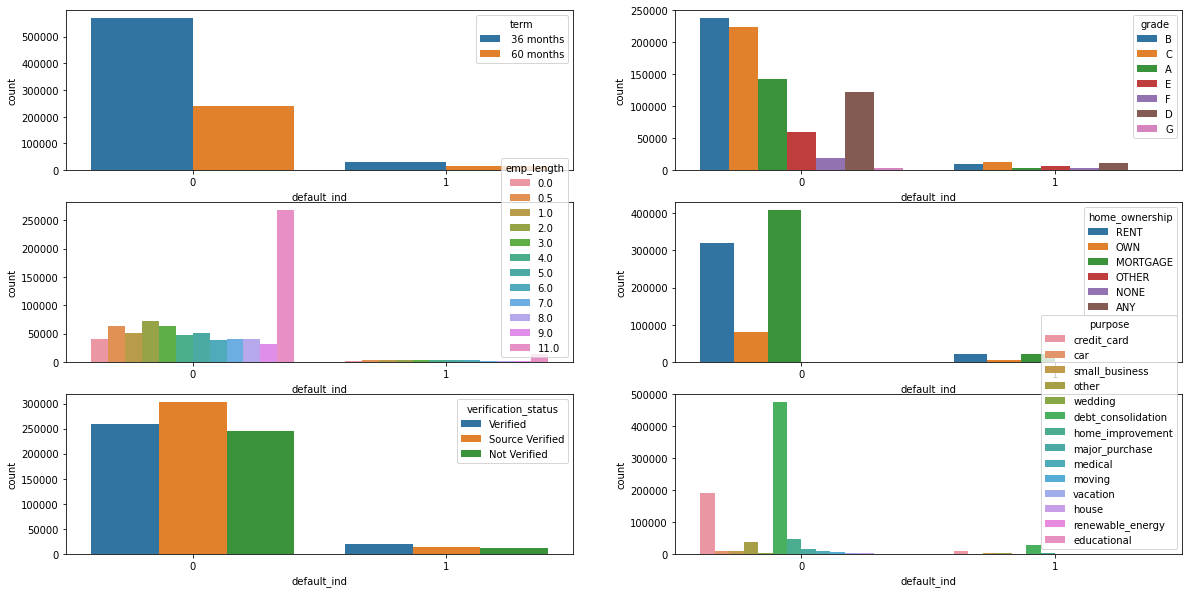

In [26]:
##### Understand categorical features against default status 
##### This is an imbalanced data 

_,axss = plt.subplots(3,2, figsize=[20,10])
sns.countplot(x='default_ind', hue='term', data= df_cleaned, ax=axss[0][0])
sns.countplot(x='default_ind', hue='grade', data= df_cleaned, ax=axss[0][1])
sns.countplot(x='default_ind', hue='emp_length', data= df_cleaned, ax=axss[1][0])
sns.countplot(x='default_ind', hue='home_ownership', data= df_cleaned, ax=axss[1][1])
sns.countplot(x='default_ind', hue='verification_status', data= df_cleaned, ax=axss[2][0])
sns.countplot(x='default_ind', hue='purpose', data= df_cleaned, ax=axss[2][1])

In [27]:

##### total loan amount issued by State
df_location = df_cleaned.groupby("addr_state",).sum().reset_index()
df_location = df_location.filter(["addr_state", "loan_amnt"], axis = 1)
df_location = df_location.sort_values(by='loan_amnt', ascending=False)

df_location.head()

,addr_state,loan_amnt
4,CA,1832341975
43,TX,1070083350
34,NY,1032442950
9,FL,816824300
14,IL,522189925


In [28]:
##### pip install nbformat

In [29]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=df_location['addr_state'], 
    z = df_location['loan_amnt'].astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'Reds',
    colorbar_title = "USD",
))

fig.update_layout(
    title_text = 'Total amount issued by State',
    geo_scope='usa', 
)

fig.show()

## Feature Selection: WOE and IV

In [30]:
df_cleaned.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'policy_code', 'application_type', 'acc_now_delinq',
       'default_ind', 'emp_title', 'emp_length', 'title',
       'mths_since_last_delinq', 'mths_since_last_record', 'revol_util',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'issue_d_days',
       'earliest_cr_line_days', 'last_pymnt_d_days', 'next_pymnt_d_days',
       'last_c

In [31]:
##### For Canada's main banks like CIBC and RBC, their credit risk model development teams use two major metrics for feature selection
##### Weight of Evidence and Information Value (For interpreting feature's predictive power)
##### Weight of Evidence (WOE)= Natural Log (Ln) { % of good events / % of bad events }

def calc_woe_iv(df, feature, target):
    """
    Calculate Weight of Evidence (WOE) and Information Value (IV) for a given feature.
    """
    eps = 1e-10
    df = df[[feature, target]].copy()
    df['total'] = 1
    df_pivot = df.pivot_table(index=feature, columns=target, values='total', aggfunc='sum', fill_value=0)
    
    df_pivot.columns = ['good', 'bad']
    df_pivot['total'] = df_pivot['good'] + df_pivot['bad']
    df_pivot['good_dist'] = df_pivot['good'] / df_pivot['good'].sum()
    df_pivot['bad_dist'] = df_pivot['bad'] / df_pivot['bad'].sum()
    
    df_pivot['woe'] = np.log((df_pivot['good_dist'] + eps) / (df_pivot['bad_dist'] + eps))
    df_pivot['iv'] = (df_pivot['good_dist'] - df_pivot['bad_dist']) * df_pivot['woe']
    
    iv = df_pivot['iv'].sum()
    
    return df_pivot[['woe']], iv


##### We fit transform continuous variables to intervals for scalling

def bin_continuous_variable(df, feature, bins= 10 ):
    """
    Bin a continuous variable into equal frequency bins.
    """
    # Handle missing values by filling with the median
    df[feature] = df[feature].fillna(df[feature].median())
    # Ensure no duplicate bin edges
    df[feature+'_binned'] = pd.qcut(df[feature], q=bins, duplicates='drop')
    return df


##### Information Value (IV)= Sigma (% Event - % Non Event ) x WOE 
##### Metrics for general credit risk feature selection (regardless each bank's loan type):
##### IV > 0.5 : Significant Strong Feature for Prediction 
##### 0.1 < IV < 0.5 Strong Feature 
##### 0.01 < IV < 0.1 Medium to Weak Feature 
##### IV < 0.01 Not Strong Enough for Prediction 

def calculate_woe_iv_for_all_features(df, features, target, bins=10):
    """
    Calculate WOE and IV for all variables in the DataFrame except target columns.
    """
    iv_list = []
    woe_dict = {}
    
    for feature in features:
        if feature in df.columns and feature != target:
            if df[feature].dtype == 'object' or df[feature].nunique() <= bins:
                woe, iv = calc_woe_iv(df, feature, target)
            else:
                df = bin_continuous_variable(df, feature, bins)
                woe, iv = calc_woe_iv(df, feature+'_binned', target)
                df.drop(columns=[feature+'_binned'], inplace=True)
            
            iv_list.append({'Feature': feature, 'IV': iv})
            woe_dict[feature] = woe
    
    iv_list = sorted(iv_list, key=lambda x: x['IV'], reverse=True)
    
    return iv_list, woe_dict

In [32]:
features = ['id', 'member_id', 'loan_amnt',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'initial_list_status', 'out_prncp', 'total_pymnt', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'policy_code', 'application_type', 'acc_now_delinq',
       'default_ind', 'emp_title', 'emp_length', 'title',
       'mths_since_last_delinq', 'mths_since_last_record', 'revol_util',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'issue_d_days',
       'earliest_cr_line_days', 'last_pymnt_d_days', 'next_pymnt_d_days',
       'last_credit_pull_d_days']

iv_list, woe_dict = calculate_woe_iv_for_all_features(df_cleaned, features, 'default_ind')


print("IV List:")
for iv in iv_list:
    print(iv)

IV List:
{'Feature': 'emp_title', 'IV': 10.593384570863472}
{'Feature': 'issue_d_days', 'IV': 4.26987763982983}
{'Feature': 'last_pymnt_d_days', 'IV': 4.077440903038695}
{'Feature': 'id', 'IV': 3.5797007107153616}
{'Feature': 'member_id', 'IV': 3.57901312909477}
{'Feature': 'out_prncp', 'IV': 3.3218899142736653}
{'Feature': 'title', 'IV': 3.091327917881394}
{'Feature': 'next_pymnt_d_days', 'IV': 2.7401753927289345}
{'Feature': 'last_pymnt_amnt', 'IV': 0.6384176331899007}
{'Feature': 'last_credit_pull_d_days', 'IV': 0.5694461192384659}
{'Feature': 'int_rate', 'IV': 0.5085242047791196}
{'Feature': 'sub_grade', 'IV': 0.33051554405949224}
{'Feature': 'grade', 'IV': 0.2997296580591275}
{'Feature': 'initial_list_status', 'IV': 0.2046732061369742}
{'Feature': 'tot_cur_bal', 'IV': 0.18951630555464782}
{'Feature': 'total_rev_hi_lim', 'IV': 0.16727861608182987}
{'Feature': 'total_pymnt', 'IV': 0.15000736326166497}
{'Feature': 'inq_last_6mths', 'IV': 0.09952278743768175}
{'Feature': 'total_rec_in

In [33]:
##### we drop features with IV smaller than 0.01, alongside with irrelevant values such as 'id' and 'member_id'

columns = ['id', 'member_id', 'emp_length', 'open_acc', 'total_acc','application_type', 'pub_rec', 'mths_since_last_delinq','installment','funded_amnt_inv',
           'funded_amnt','loan_amnt','delinq_2yrs','acc_now_delinq','pymnt_plan','total_rec_late_fee',
           'recoveries','collection_recovery_fee','policy_code','collections_12_mths_ex_med','funded_amnt', 'total_pymnt_inv', 'total_rec_prncp', 'out_prncp_inv',
           'zip_code']

df_feature_eng = df_cleaned.drop(columns, axis = 1)
df_feature_eng.head()
df_feature_eng.columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'addr_state', 'dti',
       'inq_last_6mths', 'revol_bal', 'initial_list_status', 'out_prncp',
       'total_pymnt', 'total_rec_int', 'last_pymnt_amnt', 'default_ind',
       'emp_title', 'title', 'mths_since_last_record', 'revol_util',
       'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'issue_d_days', 'earliest_cr_line_days',
       'last_pymnt_d_days', 'next_pymnt_d_days', 'last_credit_pull_d_days'],
      dtype='object')

## Feature Engineering - Index Mapping

In [34]:
non_continuous_cols = df_feature_eng.select_dtypes(exclude=[np.number]).columns.tolist()

# Display the list of non-continuous variables
non_continuous_cols

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'addr_state',
 'initial_list_status',
 'emp_title',
 'title']

In [35]:
###### Frequency Encoding Emp_title to avoid excessive amount of dummy variables (n > 200,000 categories)

freq_encoding = df_feature_eng['emp_title'].value_counts().to_dict()
df_feature_eng['emp_title_encoded'] = df_feature_eng['emp_title'].map(freq_encoding)

freq_encoding = df_feature_eng['title'].value_counts().to_dict()
df_feature_eng['title_encoded'] = df_feature_eng['title'].map(freq_encoding)

df_feature_eng.drop(['emp_title', 'title'], axis = 1)

,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,...,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,issue_d_days,earliest_cr_line_days,last_pymnt_d_days,next_pymnt_d_days,last_credit_pull_d_days,emp_title_encoded,title_encoded
0,36 months,10.65,B,B2,RENT,24000.0,Verified,credit_card,AZ,27.65,...,0.0,0.0,23800.0,1815,11322,365,0,0.0,49443,5
1,60 months,15.27,C,C4,RENT,30000.0,Source Verified,car,GA,1.00,...,0.0,0.0,23800.0,1815,6206,1092,0,1087.0,6,11
2,36 months,15.96,C,C5,RENT,12252.0,Not Verified,small_business,IL,8.72,...,0.0,0.0,23800.0,1815,5468,725,0,0.0,49443,1
3,36 months,13.49,C,C1,RENT,49200.0,Source Verified,other,CA,20.00,...,0.0,0.0,23800.0,1815,7304,365,0,365.0,1,9
4,60 months,12.69,B,B5,RENT,80000.0,Source Verified,other,OR,17.94,...,0.0,0.0,23800.0,1815,7305,0,-1,0.0,1,1141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,36 months,11.99,B,B5,RENT,31000.0,Verified,debt_consolidation,CA,28.69,...,0.0,25274.0,17100.0,365,4375,0,-1,0.0,190,398089
855965,36 months,11.99,B,B5,MORTGAGE,79000.0,Verified,home_improvement,NJ,3.90,...,0.0,140285.0,10200.0,365,15338,0,-1,0.0,40,38633
855966,60 months,15.99,D,D2,RENT,35000.0,Verified,debt_consolidation,TN,30.90,...,0.0,34178.0,18000.0,365,4740,0,-1,0.0,2,398089
855967,60 months,19.99,E,E3,RENT,64400.0,Source Verified,debt_consolidation,MA,27.19,...,0.0,58418.0,27000.0,365,4739,0,-1,0.0,187,398089


In [36]:
##### Use enumerations and mappings to change to automatically assign categorical features with ordinal labels 
##### Example: {'36 months term': 1, '72months term': 2 }

class_mapping = {label:idx for idx, label in enumerate(np.unique(df_feature_eng['term']))}
df_feature_eng['term'] = df_feature_eng['term'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(df_feature_eng['grade']))}
df_feature_eng['grade'] = df_feature_eng['grade'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(df_feature_eng['sub_grade']))}
df_feature_eng['sub_grade'] = df_feature_eng['sub_grade'].map(class_mapping)



In [37]:
df_feature_eng.head(5)

,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,...,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,issue_d_days,earliest_cr_line_days,last_pymnt_d_days,next_pymnt_d_days,last_credit_pull_d_days,emp_title_encoded,title_encoded
0,0,10.65,1,6,RENT,24000.0,Verified,credit_card,AZ,27.65,...,0.0,0.0,23800.0,1815,11322,365,0,0.0,49443,5
1,1,15.27,2,13,RENT,30000.0,Source Verified,car,GA,1.00,...,0.0,0.0,23800.0,1815,6206,1092,0,1087.0,6,11
2,0,15.96,2,14,RENT,12252.0,Not Verified,small_business,IL,8.72,...,0.0,0.0,23800.0,1815,5468,725,0,0.0,49443,1
3,0,13.49,2,10,RENT,49200.0,Source Verified,other,CA,20.00,...,0.0,0.0,23800.0,1815,7304,365,0,365.0,1,9
4,1,12.69,1,9,RENT,80000.0,Source Verified,other,OR,17.94,...,0.0,0.0,23800.0,1815,7305,0,-1,0.0,1,1141


## Feature Engineering: Split Set and Standardization

In [38]:
X = df_feature_eng.drop('default_ind', axis = 1)
y = df_feature_eng['default_ind']


In [39]:

from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names_out(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = ['home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status']
enc_ohe = OneHotEncoder(handle_unknown= 'ignore')
enc_ohe.fit(X[categories])

X = OneHotEncoding(X, enc_ohe, categories)


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_cols = X.select_dtypes(include=[np.number]).columns

scaler.fit(X[num_cols])
X[num_cols] = scaler.transform(X[num_cols])

X.head(5)

,term,int_rate,grade,sub_grade,annual_inc,dti,inq_last_6mths,revol_bal,out_prncp,total_pymnt,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w
0,-0.652755,-0.581985,-0.596218,-0.752646,-0.794704,0.546834,0.330990,-0.146804,-0.97907,-0.226595,...,-0.295423,-0.084405,-0.174286,-0.045301,-0.149921,-0.115138,-0.070614,-0.048078,0.966516,-0.966516
1,1.531967,0.475620,0.170277,0.332167,-0.701340,-0.982699,4.480228,-0.685012,-0.97907,-0.840090,...,-0.295423,-0.084405,-0.174286,-0.045301,-0.149921,-0.115138,-0.070614,-0.048078,0.966516,-0.966516
2,-0.652755,0.633574,0.170277,0.487140,-0.977511,-0.539622,1.368299,-0.627911,-0.97907,-0.587864,...,-0.295423,-0.084405,-0.174286,-0.045301,-0.149921,-0.115138,-0.070614,-0.048078,0.966516,-0.966516
3,-0.652755,0.068145,0.170277,-0.132753,-0.402574,0.107775,0.330990,-0.509029,-0.97907,0.578175,...,-0.295423,-0.084405,-0.174286,-0.045301,-0.149921,-0.115138,-0.070614,-0.048078,0.966516,-0.966516
4,1.531967,-0.114990,-0.596218,-0.287726,0.076696,-0.010455,-0.706319,0.489228,-0.88844,-0.557708,...,-0.295423,-0.084405,-0.174286,-0.045301,-0.149921,-0.115138,-0.070614,-0.048078,0.966516,-0.966516


In [41]:

##### Drop any remaining categorical labels that are un-encodeable(if any are left unencoded)
X = X.select_dtypes(exclude=['object'])
X = X.select_dtypes(exclude=['object'])


In [42]:
X.head()

,term,int_rate,grade,sub_grade,annual_inc,dti,inq_last_6mths,revol_bal,out_prncp,total_pymnt,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w
0,-0.652755,-0.581985,-0.596218,-0.752646,-0.794704,0.546834,0.330990,-0.146804,-0.97907,-0.226595,...,-0.295423,-0.084405,-0.174286,-0.045301,-0.149921,-0.115138,-0.070614,-0.048078,0.966516,-0.966516
1,1.531967,0.475620,0.170277,0.332167,-0.701340,-0.982699,4.480228,-0.685012,-0.97907,-0.840090,...,-0.295423,-0.084405,-0.174286,-0.045301,-0.149921,-0.115138,-0.070614,-0.048078,0.966516,-0.966516
2,-0.652755,0.633574,0.170277,0.487140,-0.977511,-0.539622,1.368299,-0.627911,-0.97907,-0.587864,...,-0.295423,-0.084405,-0.174286,-0.045301,-0.149921,-0.115138,-0.070614,-0.048078,0.966516,-0.966516
3,-0.652755,0.068145,0.170277,-0.132753,-0.402574,0.107775,0.330990,-0.509029,-0.97907,0.578175,...,-0.295423,-0.084405,-0.174286,-0.045301,-0.149921,-0.115138,-0.070614,-0.048078,0.966516,-0.966516
4,1.531967,-0.114990,-0.596218,-0.287726,0.076696,-0.010455,-0.706319,0.489228,-0.88844,-0.557708,...,-0.295423,-0.084405,-0.174286,-0.045301,-0.149921,-0.115138,-0.070614,-0.048078,0.966516,-0.966516


## Pre-Model Evaluation: Cross Validation to Examine Overfitting

In [47]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [49]:
##### 101 features means models could be biased or overfitted towards one variable 
##### We use cross validation to evaluate if models are fine to use


##### Three major models for bank's credit risk modeling team
##### Logistic Regression (the only legitimate model for many banks and financial industies under government regulation)
##### XGBoost (some banks use it for feature importance)
##### Random Forest (Rarely used but for comparasion purposes)


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for each model
for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('model', model)
    ])
    
   
    cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
    mean_cv_score = cv_scores.mean()
    
    print(f"{model_name} cross-validation accuracy scores: {cv_scores}")
    print(f"{model_name} mean cross-validation accuracy: {mean_cv_score}\n")

   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    pipeline.fit(X_train, y_train)

    test_accuracy = pipeline.score(X_test, y_test)
    print(f"{model_name} test accuracy: {test_accuracy}")

    ##### Check for overfitting
    absolute_difference = abs(test_accuracy - mean_cv_score)
    print(f"{model_name} absolute difference between test accuracy and CV mean accuracy: {absolute_difference}")

    if absolute_difference < 0.01:
        print(f"No significant overfitting detected for {model_name}.\n")
    elif absolute_difference < 0.02:
        print(f"Some overfitting detected for {model_name}, but may be acceptable depending on context.\n")
    else:
        print(f"Potential overfitting detected for {model_name}.\n")

Logistic Regression cross-validation accuracy scores: [0.9875054  0.98718413 0.98736521 0.98735353 0.98768641]
Logistic Regression mean cross-validation accuracy: 0.9874189372132346

Logistic Regression test accuracy: 0.9874761965956751
Logistic Regression absolute difference between test accuracy and CV mean accuracy: 5.7259382440499884e-05
No significant overfitting detected for Logistic Regression.

Random Forest cross-validation accuracy scores: [0.99324159 0.99374394 0.99317733 0.99296704 0.99311304]
Random Forest mean cross-validation accuracy: 0.9932485871152448

Random Forest test accuracy: 0.9934226666822435
Random Forest absolute difference between test accuracy and CV mean accuracy: 0.00017407956699877492
No significant overfitting detected for Random Forest.

XGBoost cross-validation accuracy scores: [0.99861561 0.99863313 0.99877332 0.99843452 0.99858055]
XGBoost mean cross-validation accuracy: 0.99860742617212

XGBoost test accuracy: 0.998539668446324
XGBoost absolute dif

In [ ]:
##### pip install xgboost

## Model Training

In [ ]:
pip install xgboost

You should consider upgrading via the 'c:\Users\James\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


#### Logistic Regression (Most Commonly Used Model in Banking Industry)

In [50]:
df_feature_eng['default_ind'].value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

In [51]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

##### Logistic Regression
log_reg = LogisticRegression(solver = 'lbfgs')

##### XGB
XGB = xgb.XGBClassifier(learning_rate=0.1)

##### Random Forest 
RF = RandomForestClassifier()

##### function  helper for finding grid search results #####
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [98]:
##### Train and test the logistic regression model
log_reg.fit(X_train, y_train)
preds = log_reg.predict_proba(X_test)
preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   default_ind  prob_default
0            0  5.726980e-02
1            0  2.076021e-03
2            0  5.561365e-04
3            0  3.088231e-08
4            0  1.257779e-05


In [99]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

##### Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

##### Based on the industry standard, we decide to use 5% threshold as a classifier 
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.05 else 0)

print(preds_df['loan_status'].value_counts())

target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

##### In credit risk modeling, Recall is more important than precision.
##### Banks always ensures that they identify the majority of potential defaulters, thereby reducing financial losses and maintaining regulatory compliance, even if it means dealing with some false positives.
##### Industry Range: Precision 50-70%, Recall 80-95%.
##### The model has medium predictive power in precision, and strong power in recall, thus this is a reasonable model

0    153244
1     17950
Name: loan_status, dtype: int64
              precision    recall  f1-score   support

 Non-Default       1.00      0.94      0.97    161791
     Default       0.50      0.96      0.66      9403

    accuracy                           0.95    171194
   macro avg       0.75      0.95      0.81    171194
weighted avg       0.97      0.95      0.95    171194



In [55]:
##### We use penalized methods (L1: Lasso, L2: Ridge to shrink model parameters to find optimal results )
#################### DON'T RUN IT TAKES ONE HOUR !!!!!!!!!!!!! #####################################
##### We've already know best param lambda = 0.5, method = Lasso Regression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, make_scorer

parameters = {
    'penalty': ('l2', 'l1'),
    'C': [0.01, 0.05, 0.1, 0.5, 1]
}

##### Perform GridSearchCV to find the optimal hyperparameters
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'), parameters, scoring= 'f1', cv=5)
Grid_LR.fit(X_train, y_train)

#############################################################################################

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1],
                         'penalty': ('l2', 'l1')},
             scoring='f1')

In [56]:
print_grid_search_metrics(Grid_LR)

Best score: 0.879384150750122
Best parameters set:
C:1
penalty:l1


c:\Users\James\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



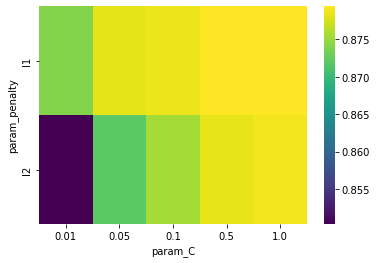

In [57]:
LR_models = pd.DataFrame(Grid_LR.cv_results_)
res = (LR_models.pivot(index='param_penalty', columns='param_C', values='mean_test_score')
            )
_ = sns.heatmap(res, cmap='viridis')
     

In [58]:
##### best logistic regression model
best_LR_model = Grid_LR.best_estimator_
best_preds_lr = best_LR_model.predict_proba(X_test)


In [59]:
##### Create a dataframe again for the best results
preds_df_lr = pd.DataFrame(best_preds_lr[:,1], columns = ['prob_default'])

preds_df_lr['loan_status'] = preds_df_lr['prob_default'].apply(lambda x: 1 if x > 0.05 else 0)

print(preds_df_lr['loan_status'].value_counts())
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df_lr['loan_status'], target_names=target_names))

##### only one percent up on recall score (non-default)


0    153317
1     17877
Name: loan_status, dtype: int64
              precision    recall  f1-score   support

 Non-Default       1.00      0.95      0.97    161791
     Default       0.50      0.96      0.66      9403

    accuracy                           0.95    171194
   macro avg       0.75      0.95      0.81    171194
weighted avg       0.97      0.95      0.95    171194



#### Undersample for Logistic Regression (Solve loan status imbalance)

In [ ]:
pip install imblearn

     -------------------------------------- 258.3/258.3 KB 7.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\James\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [60]:
###### We resample the y variable to have equal amount of 0 and 1
###### Weakness: may loss huge part of original data 

X_y_train = pd.concat([X_train.reset_index(drop = True),
                       y_train.reset_index(drop = True)], axis = 1)
count_nondefault, count_default = X_y_train['default_ind'].value_counts()
nondefaults = X_y_train[X_y_train['default_ind'] == 0]

defaults = X_y_train[X_y_train['default_ind'] == 1]

nondefaults_under = nondefaults.sample(count_default)

X_y_train_under = pd.concat(
    [nondefaults_under.reset_index(drop = True),
    defaults.reset_index(drop = True)], axis =0
)

print(X_y_train_under['default_ind'].value_counts())



0    37064
1    37064
Name: default_ind, dtype: int64


In [61]:

##### Redo the model testing again 
X_train_res = X_y_train_under.drop('default_ind', axis = 1)
y_train_res = X_y_train_under['default_ind']

log_reg.fit(X_train_res, y_train_res)
preds_resample = log_reg.predict_proba(X_test)

preds_df = pd.DataFrame(preds_resample[:,1], columns = ['prob_default'])

##### Based on the industry standard, we decide to use 5% threshold as a classifier 
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.05 else 0)


# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

##### The resampled model has slightly better recall, but significantly decreased precision
##### We choose to stick with the original logistic regression model 
##### Recall is our top metrics over precision, but precision score couldn't be too low


C:\Users\James\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

 Non-Default       1.00      0.73      0.84    161791
     Default       0.17      0.98      0.29      9403

    accuracy                           0.74    171194
   macro avg       0.59      0.85      0.57    171194
weighted avg       0.95      0.74      0.81    171194



#### XGBoost (Second Commonly Used Model in Banks)

In [75]:
##### Fit the model
XGB_model = XGB.fit(X_train, y_train)
preds_xgb = XGB_model.predict_proba(X_test)
preds_df_xgb = pd.DataFrame(preds_xgb[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

print(pd.concat([true_df.reset_index(drop = True), preds_df_xgb], axis = 1))

   default_ind  prob_default
0            0      0.068914
1            0      0.000082
2            0      0.000044
3            0      0.000040
4            0      0.000353


In [76]:
##### XGB Model Report
preds_df_xgb = pd.DataFrame(preds_xgb[:,1], columns = ['prob_default'])

##### Based on the industry standard, we decide to use 5% threshold as a classifier 
preds_df_xgb['loan_status'] = preds_df_xgb['prob_default'].apply(lambda x: 1 if x > 0.05 else 0)

print(preds_df_xgb['loan_status'].value_counts())

target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df_xgb['loan_status'], target_names=target_names))


0    159729
1     11465
Name: loan_status, dtype: int64
              precision    recall  f1-score   support

 Non-Default       1.00      0.99      0.99    161791
     Default       0.81      0.99      0.89      9403

    accuracy                           0.99    171194
   macro avg       0.91      0.99      0.94    171194
weighted avg       0.99      0.99      0.99    171194



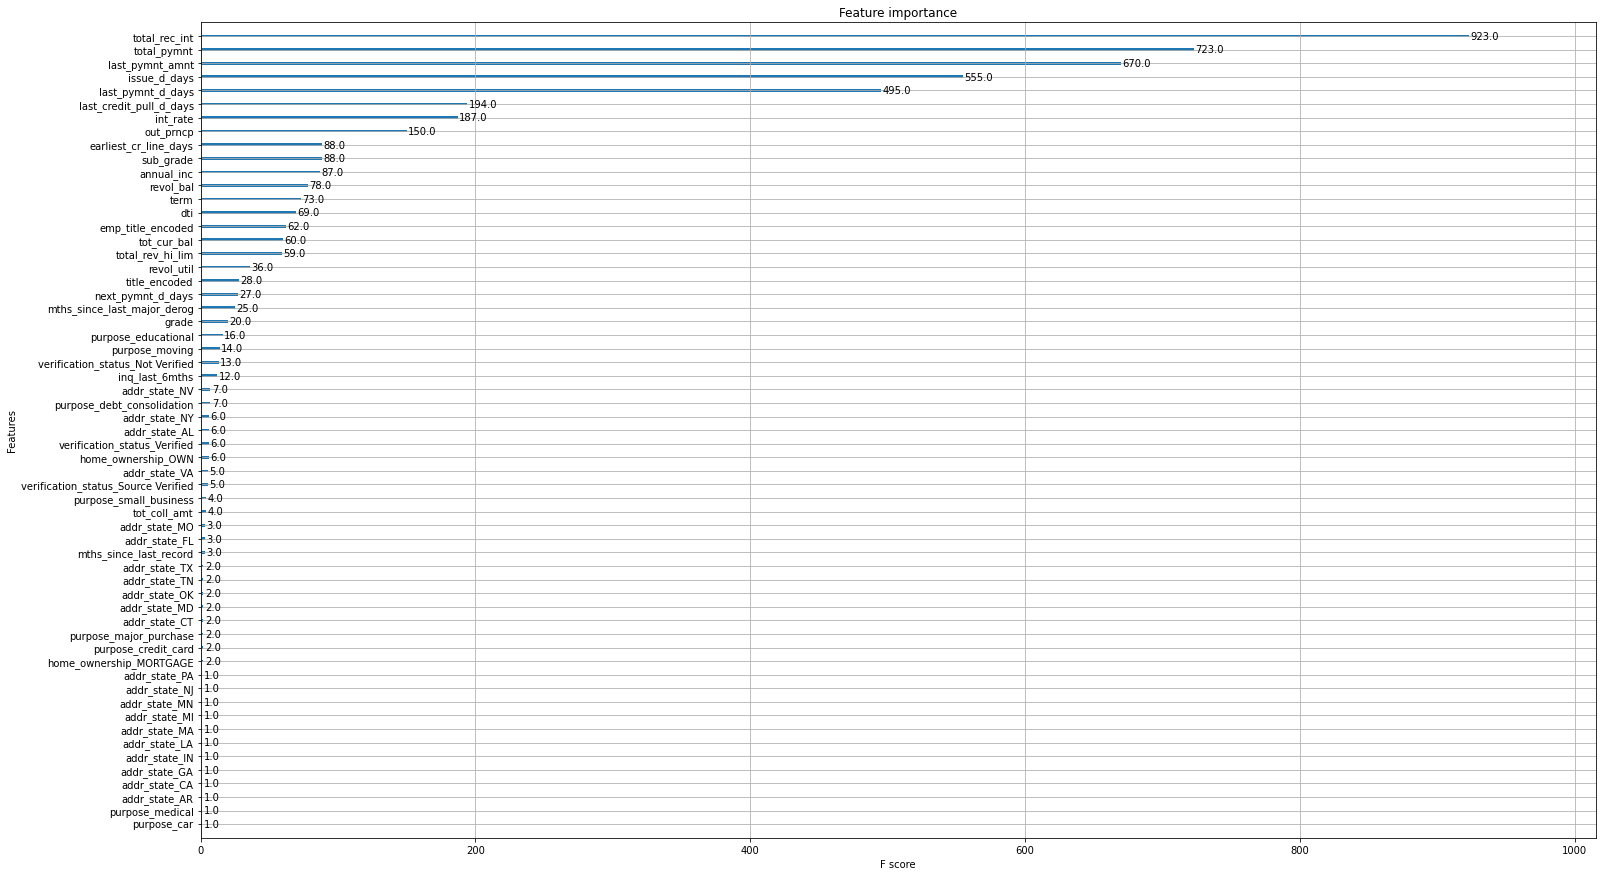

In [80]:
##### F score for XGB result
fig, ax = plt.subplots(figsize=(25, 15))  # You can adjust the width and height to your preference
xgb.plot_importance(XGB_model, ax=ax, importance_type='weight')

plt.show()

In [ ]:
pip install shap

     -------------------------------------- 456.1/456.1 KB 9.5 MB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 28.5 MB/s eta 0:00:00
     --------------------------------------- 28.1/28.1 MB 23.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\James\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


#### Random Forest (Not Often Used, but for Feature Importance Comparasion)

In [82]:
# Define and fit the Random Forest model
RF_model = RandomForestClassifier(random_state=42)
RF_model.fit(X_train, y_train)

preds_rf = RF_model.predict_proba(X_test)
preds_df_rf = pd.DataFrame(preds_rf[:,1], columns=['prob_default'])

true_df = y_test.head()
preds_df_rf_sample = pd.DataFrame(preds_rf[:,1][0:5], columns=['prob_default'])
print(pd.concat([true_df.reset_index(drop=True), preds_df_rf_sample], axis=1))

   default_ind  prob_default
0            0          0.08
1            0          0.00
2            0          0.00
3            0          0.00
4            0          0.00


In [83]:
##### Apply 5% threshold as a classifier
preds_df_rf['loan_status'] = preds_df_rf['prob_default'].apply(lambda x: 1 if x > 0.05 else 0)

##### Print the row counts for each loan status
print(preds_df_rf['loan_status'].value_counts())

#### Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df_rf['loan_status'], target_names=target_names))


0    153676
1     17518
Name: loan_status, dtype: int64
              precision    recall  f1-score   support

 Non-Default       1.00      0.95      0.97    161791
     Default       0.53      1.00      0.70      9403

    accuracy                           0.95    171194
   macro avg       0.77      0.97      0.83    171194
weighted avg       0.97      0.95      0.96    171194



## Post-Model Evaluation: Overall Performance and Feature Importance

#### Calibration Curve

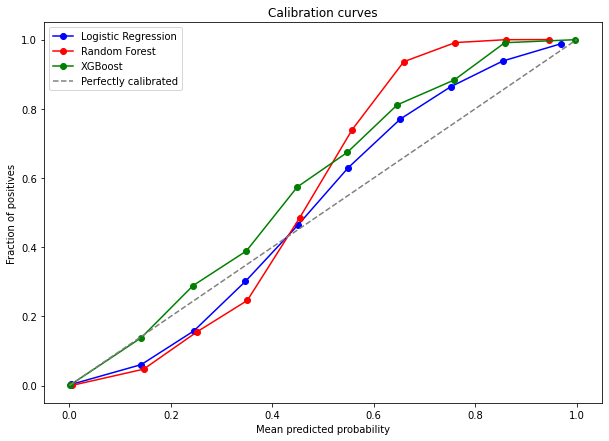

In [97]:
from sklearn.calibration import calibration_curve

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### LR
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg.fit(X_train, y_train)
preds_lr = log_reg.predict_proba(X_test)[:, 1]

##### RF
RF_model = RandomForestClassifier(random_state=42)
RF_model.fit(X_train, y_train)
preds_rf = RF_model.predict_proba(X_test)[:, 1]

##### XGB
XGB_model = XGBClassifier(random_state=42)
XGB_model.fit(X_train, y_train)
preds_xgb = XGB_model.predict_proba(X_test)[:, 1]


preds_rf_thresholded = (preds_rf > 0.05).astype(int)

prob_true_lr, prob_pred_lr = calibration_curve(y_test, preds_lr, n_bins=10)
prob_true_rf, prob_pred_rf = calibration_curve(y_test, preds_rf, n_bins=10)
prob_true_xgb, prob_pred_xgb = calibration_curve(y_test, preds_xgb, n_bins=10)

#####  calibration curves
plt.figure(figsize=(10, 7))
plt.plot(prob_pred_lr, prob_true_lr, marker='o', label='Logistic Regression', color='blue')
plt.plot(prob_pred_rf, prob_true_rf, marker='o', label='Random Forest', color='red')
plt.plot(prob_pred_xgb, prob_true_xgb, marker='o', label='XGBoost', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated', color='gray')

plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration curves')
plt.legend()
plt.show()

##### XGBoost appears to be the most well-calibrated model overall, making it a strong candidate for applications where accurate probability estimates are crucial.
##### Logistic Regression is reasonably calibrated at lower probabilities but might need adjustment at higher probabilities.
##### Random Forest consistently over-predicts, so it might not be the best choice if accurate probability estimation is needed without further calibration.

#### Feature Importance: Logistic Regression

In [109]:
X_LR = X.copy()
X_LR.head()

,term,int_rate,grade,sub_grade,annual_inc,dti,inq_last_6mths,revol_bal,out_prncp,total_pymnt,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w
0,-0.652755,-0.581985,-0.596218,-0.752646,-0.794704,0.546834,0.330990,-0.146804,-0.97907,-0.226595,...,-0.295423,-0.084405,-0.174286,-0.045301,-0.149921,-0.115138,-0.070614,-0.048078,0.966516,-0.966516
1,1.531967,0.475620,0.170277,0.332167,-0.701340,-0.982699,4.480228,-0.685012,-0.97907,-0.840090,...,-0.295423,-0.084405,-0.174286,-0.045301,-0.149921,-0.115138,-0.070614,-0.048078,0.966516,-0.966516
2,-0.652755,0.633574,0.170277,0.487140,-0.977511,-0.539622,1.368299,-0.627911,-0.97907,-0.587864,...,-0.295423,-0.084405,-0.174286,-0.045301,-0.149921,-0.115138,-0.070614,-0.048078,0.966516,-0.966516
3,-0.652755,0.068145,0.170277,-0.132753,-0.402574,0.107775,0.330990,-0.509029,-0.97907,0.578175,...,-0.295423,-0.084405,-0.174286,-0.045301,-0.149921,-0.115138,-0.070614,-0.048078,0.966516,-0.966516
4,1.531967,-0.114990,-0.596218,-0.287726,0.076696,-0.010455,-0.706319,0.489228,-0.88844,-0.557708,...,-0.295423,-0.084405,-0.174286,-0.045301,-0.149921,-0.115138,-0.070614,-0.048078,0.966516,-0.966516


In [110]:
##### We apply L1 regularization to logistic regression for reducing model complexity 
##### Shrink large scale parameters for better interpretation 

scaler = StandardScaler()
X_l1 = scaler.fit_transform(X_LR)
LRmodel_l1 = LogisticRegression(penalty="l1", C = 1, solver='liblinear')
LRmodel_l1.fit(X_l1, y)

indices = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

print ("Logistic Regression (L1) Coefficients")
for ind in range(X_LR.shape[1]):
  print ("{0} : {1}".format(X_LR.columns[indices[ind]],round(LRmodel_l1.coef_[0][indices[ind]], 4)))
     

##### last_pymnt_amnt, out_prncp, total_pymnt: As long as people pay more, less likly to default 
##### total_rec_int, int_rate, payment/issues days: the longer they didn't pay, or the higher the interest, more likely tp default 


Logistic Regression (L1) Coefficients
last_pymnt_amnt : -7.3231
out_prncp : -7.0221
total_rec_int : 3.5724
total_pymnt : -3.3943
sub_grade : -1.9732
int_rate : 1.9535
issue_d_days : -1.6884
last_pymnt_d_days : 1.6826
next_pymnt_d_days : 1.3683
term : 0.5262
initial_list_status_w : -0.4114
initial_list_status_f : -0.4019
tot_cur_bal : 0.1553
verification_status_Not Verified : -0.1548
tot_coll_amt : -0.148
purpose_debt_consolidation : 0.1404
revol_bal : 0.13
purpose_other : -0.1254
purpose_major_purchase : -0.1015
addr_state_ME : -0.0951
addr_state_ND : -0.0936
purpose_credit_card : 0.0824
purpose_vacation : -0.0772
revol_util : 0.0739
purpose_home_improvement : -0.0658
annual_inc : 0.0656
grade : -0.0617
purpose_car : -0.0608
purpose_medical : -0.0547
inq_last_6mths : 0.0527
mths_since_last_record : 0.0507
purpose_moving : -0.0491
purpose_small_business : 0.0452
mths_since_last_major_derog : 0.0423
last_credit_pull_d_days : 0.041
addr_state_MA : 0.0403
addr_state_DC : -0.0376
addr_state

#### Feature Importance: XGBoost

In [103]:
X_XGB = X.copy()

X_XGB.head()
     

,term,int_rate,grade,sub_grade,annual_inc,dti,inq_last_6mths,revol_bal,out_prncp,total_pymnt,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w
0,-0.652755,-0.581985,-0.596218,-0.752646,-0.794704,0.546834,0.330990,-0.146804,-0.97907,-0.226595,...,-0.295423,-0.084405,-0.174286,-0.045301,-0.149921,-0.115138,-0.070614,-0.048078,0.966516,-0.966516
1,1.531967,0.475620,0.170277,0.332167,-0.701340,-0.982699,4.480228,-0.685012,-0.97907,-0.840090,...,-0.295423,-0.084405,-0.174286,-0.045301,-0.149921,-0.115138,-0.070614,-0.048078,0.966516,-0.966516
2,-0.652755,0.633574,0.170277,0.487140,-0.977511,-0.539622,1.368299,-0.627911,-0.97907,-0.587864,...,-0.295423,-0.084405,-0.174286,-0.045301,-0.149921,-0.115138,-0.070614,-0.048078,0.966516,-0.966516
3,-0.652755,0.068145,0.170277,-0.132753,-0.402574,0.107775,0.330990,-0.509029,-0.97907,0.578175,...,-0.295423,-0.084405,-0.174286,-0.045301,-0.149921,-0.115138,-0.070614,-0.048078,0.966516,-0.966516
4,1.531967,-0.114990,-0.596218,-0.287726,0.076696,-0.010455,-0.706319,0.489228,-0.88844,-0.557708,...,-0.295423,-0.084405,-0.174286,-0.045301,-0.149921,-0.115138,-0.070614,-0.048078,0.966516,-0.966516


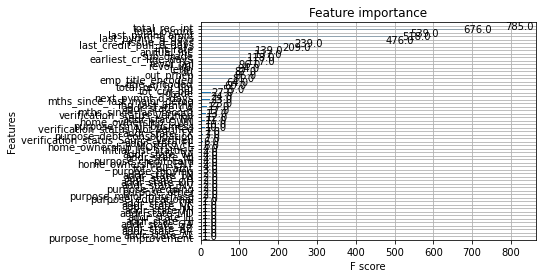

Feature importance ranking by XGB Model:
last_pymnt_amnt : 0.2696000039577484
last_pymnt_d_days : 0.243599995970726
issue_d_days : 0.11169999837875366
term : 0.10350000113248825
total_pymnt : 0.04100000113248825
out_prncp : 0.03229999914765358
total_rec_int : 0.02889999933540821
last_credit_pull_d_days : 0.021400000900030136
verification_status_Not Verified : 0.01640000008046627
int_rate : 0.014800000004470348
tot_cur_bal : 0.00860000029206276
sub_grade : 0.007899999618530273
next_pymnt_d_days : 0.006399999838322401
title_encoded : 0.006399999838322401
total_rev_hi_lim : 0.004900000058114529
grade : 0.003800000064074993
revol_bal : 0.003700000001117587
annual_inc : 0.0034000000450760126
purpose_debt_consolidation : 0.003000000026077032
addr_state_HI : 0.002899999963119626
purpose_small_business : 0.0027000000700354576
addr_state_NY : 0.002400000113993883
mths_since_last_record : 0.002300000051036477
addr_state_FL : 0.002300000051036477
addr_state_OH : 0.002300000051036477
addr_state_GA

In [105]:
import xgboost as xgb
# check feature importance of random forest for feature selection
clf_gbt3 = xgb.XGBClassifier().fit(X_XGB, y)

xgb.plot_importance(clf_gbt3, importance_type = 'weight')
plt.show()

############## OR #######################
booster = XGBClassifier()
booster.fit(X_XGB, y)

importance = booster.feature_importances_

indices = np.argsort(importance)[::-1]

# Print the feature ranking
print("Feature importance ranking by XGB Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X_XGB.columns[indices[ind]],round(importance[indices[ind]], 4)))

#### SHAP Value Unfluence: XGBoost

In [ ]:
pip install shap

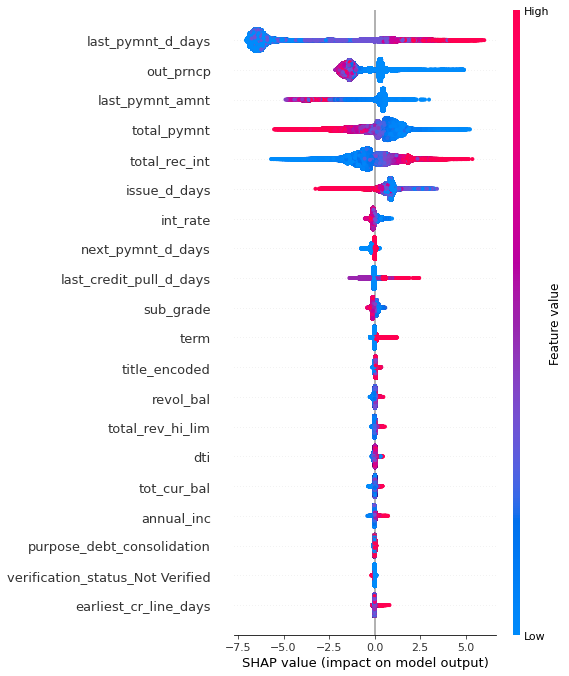

In [111]:
import shap

# Fit the model (assuming X_train and y_train are already defined)
XGB.fit(X_train, y_train)

explainer = shap.Explainer(XGB)

shap_values = explainer(X_train)

shap.summary_plot(shap_values, X_train)

####### Blue means low value, red means high value 
####### shap value axis (from left to right) represents the level of impact on credit risk model 
####### Example: last_pymnt_d_days: higher value have higher impact on the model result

#### Feature Importance: Random Forest (Only for Comparasion)

In [107]:
X_RF = X.copy()
X_RF.head()

,term,int_rate,grade,sub_grade,annual_inc,dti,inq_last_6mths,revol_bal,out_prncp,total_pymnt,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w
0,-0.652755,-0.581985,-0.596218,-0.752646,-0.794704,0.546834,0.330990,-0.146804,-0.97907,-0.226595,...,-0.295423,-0.084405,-0.174286,-0.045301,-0.149921,-0.115138,-0.070614,-0.048078,0.966516,-0.966516
1,1.531967,0.475620,0.170277,0.332167,-0.701340,-0.982699,4.480228,-0.685012,-0.97907,-0.840090,...,-0.295423,-0.084405,-0.174286,-0.045301,-0.149921,-0.115138,-0.070614,-0.048078,0.966516,-0.966516
2,-0.652755,0.633574,0.170277,0.487140,-0.977511,-0.539622,1.368299,-0.627911,-0.97907,-0.587864,...,-0.295423,-0.084405,-0.174286,-0.045301,-0.149921,-0.115138,-0.070614,-0.048078,0.966516,-0.966516
3,-0.652755,0.068145,0.170277,-0.132753,-0.402574,0.107775,0.330990,-0.509029,-0.97907,0.578175,...,-0.295423,-0.084405,-0.174286,-0.045301,-0.149921,-0.115138,-0.070614,-0.048078,0.966516,-0.966516
4,1.531967,-0.114990,-0.596218,-0.287726,0.076696,-0.010455,-0.706319,0.489228,-0.88844,-0.557708,...,-0.295423,-0.084405,-0.174286,-0.045301,-0.149921,-0.115138,-0.070614,-0.048078,0.966516,-0.966516


In [108]:

forest = RandomForestClassifier()
forest.fit(X_RF, y)

importance = forest.feature_importances_

indices = np.argsort(importance)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X_RF.columns[indices[ind]],round(importance[indices[ind]], 4)))

##### higher number will influence more on model decision


Feature importance ranking by Random Forest Model:
last_pymnt_amnt : 0.2391
last_pymnt_d_days : 0.1602
total_pymnt : 0.1306
out_prncp : 0.0632
issue_d_days : 0.0502
total_rec_int : 0.0461
last_credit_pull_d_days : 0.0339
next_pymnt_d_days : 0.0279
int_rate : 0.0254
tot_cur_bal : 0.0196
sub_grade : 0.0165
revol_bal : 0.015
dti : 0.0144
title_encoded : 0.0142
annual_inc : 0.0136
term : 0.0135
total_rev_hi_lim : 0.0133
revol_util : 0.0132
earliest_cr_line_days : 0.0118
grade : 0.0095
emp_title_encoded : 0.0077
inq_last_6mths : 0.0046
mths_since_last_major_derog : 0.0035
verification_status_Not Verified : 0.003
mths_since_last_record : 0.0028
initial_list_status_w : 0.0026
verification_status_Verified : 0.0025
purpose_debt_consolidation : 0.0025
tot_coll_amt : 0.002
initial_list_status_f : 0.0019
home_ownership_RENT : 0.0018
home_ownership_MORTGAGE : 0.0018
verification_status_Source Verified : 0.0018
addr_state_CA : 0.0017
purpose_credit_card : 0.0015
addr_state_NY : 0.0013
purpose_other 